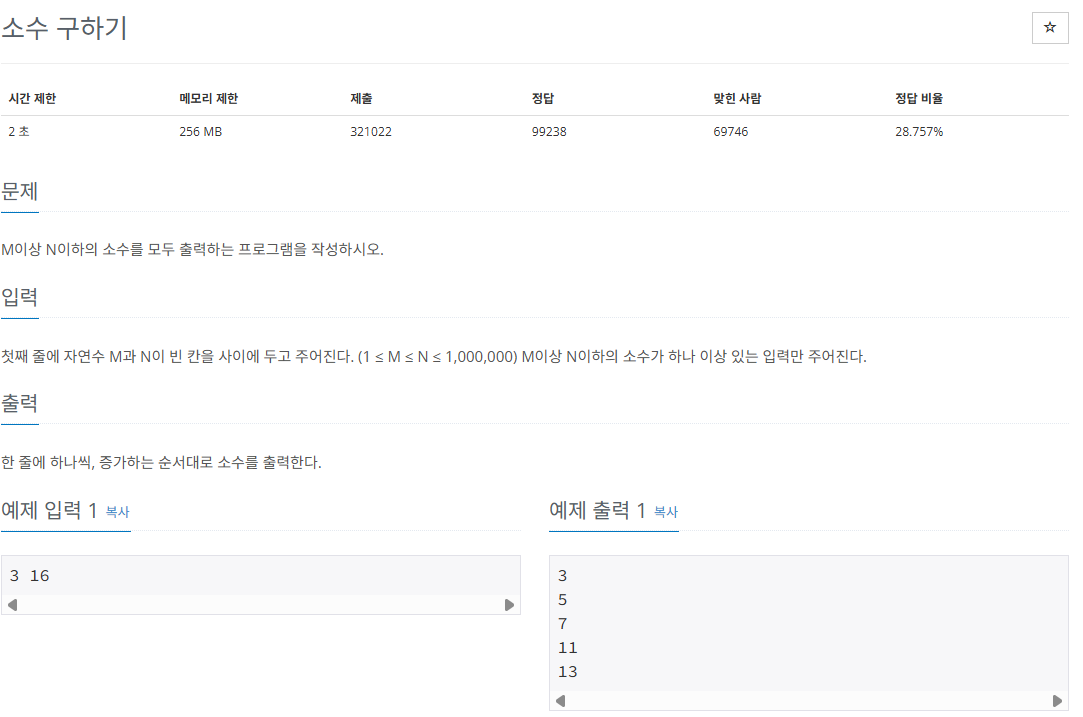

In [1]:
from PIL import Image
img=Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-07-25 033837.png")
img

In [ ]:
M,N=map(int,input().split())

is_prime = [True] * (N + 1) 



for idx, val in enumerate(is_prime):
    if val==True and idx>=2:
        i=2
        while(idx*i<=N):
           is_prime[idx*i]=False
           i+=1
    
    if idx>=2 and idx>=M and is_prime[idx]:
        print(idx)


1009
1013
1019
1021
1031
1033
1039
1049
1051
1061
1063
1069
1087
1091
1093
1097
1103
1109
1117
1123
1129
1151
1153
1163
1171
1181
1187
1193
1201
1213
1217
1223
1229
1231
1237
1249
1259
1277
1279
1283
1289
1291
1297
1301
1303
1307
1319
1321
1327
1361
1367
1373
1381
1399
1409
1423
1427
1429
1433
1439
1447
1451
1453
1459
1471
1481
1483
1487
1489
1493
1499
1511
1523
1531
1543
1549
1553
1559
1567
1571
1579
1583
1597
1601
1607
1609
1613
1619
1621
1627
1637
1657
1663
1667
1669
1693
1697
1699
1709
1721
1723
1733
1741
1747
1753
1759
1777
1783
1787
1789
1801
1811
1823
1831
1847
1861
1867
1871
1873
1877
1879
1889
1901
1907
1913
1931
1933
1949
1951
1973
1979
1987
1993
1997
1999
2003
2011
2017
2027
2029
2039
2053
2063
2069
2081
2083
2087
2089
2099
2111
2113
2129
2131
2137
2141
2143
2153
2161
2179
2203
2207
2213
2221
2237
2239
2243
2251
2267
2269
2273
2281
2287
2293
2297
2309
2311
2333
2339
2341
2347
2351
2357
2371
2377
2381
2383
2389
2393
2399
2411
2417
2423
2437
2441
2447
2459
2467
2473
2477
2503


네, '제출완료' 확인했습니다. 이전 피드백을 바탕으로 '1은 소수가 아니다'라는 예외 케이스를 정확히 처리하셨네요. 스스로 디버깅해서 코드를 개선하는 능력이 정말 좋습니다.

현재 코드는 정답을 출력하지만, '에라토스테네스의 체' 알고리즘의 효율성을 최대로 끌어내지 못하고 있으며, 코드의 구조적인 측면에서 개선할 부분이 있습니다.

-----

### \#\# 총평 및 5점 척도 평가

  * **내 풀이 (User's solution): 4.0 / 5.0 점**

      * **평가:** **정확하게 동작하는 코드입니다.** '표시하기'라는 핵심 아이디어를 올바르게 구현했으며, M과 N 사이의 값을 출력하는 로직도 정확합니다. 다만, 알고리즘의 최적화 포인트를 놓치고 있고, 코드 구조가 다소 비효율적입니다.

  * **Gemini의 풀이: 5.0 / 5.0 점**

      * **평가:** '에라토스테네스의 체' 알고리즘의 표준적인 최적화를 모두 적용하고, '체 만들기'와 '결과 출력'의 역할을 명확하게 분리하여 가독성과 효율성을 극대화한 코드입니다.

-----

### \#\# Gemini 추천 코드 (최적화 버전)

```python
import sys

M, N = map(int, sys.stdin.readline().split())

# 1. 체 만들기 (Sieving Phase)
# 0과 1은 소수가 아니므로 미리 처리
is_prime = [True] * (N + 1)
is_prime[0] = is_prime[1] = False

# 2부터 N의 제곱근까지만 확인하면 충분
for i in range(2, int(N**0.5) + 1):
    # 만약 i가 소수라면
    if is_prime[i]:
        # i의 배수들을 모두 지워나간다 (i*i부터 시작하는 최적화 적용)
        for j in range(i * i, N + 1, i):
            is_prime[j] = False

# 2. 결과 출력 (Printing Phase)
# 완성된 체를 바탕으로 M부터 N까지 순회하며 소수만 출력
for i in range(M, N + 1):
    if is_prime[i]:
        print(i)
```

-----

### \#\# 1. 알고리즘 측면

#### **내 풀이**

  * **장점:** '에라토스테네스의 체'의 기본 원리를 정확하게 구현했습니다.
  * **개선할 점:** **불필요한 반복.** `for idx, val in enumerate(is_prime):` 코드는 2부터 **N까지** 모든 숫자에 대해 그 배수를 지우는 작업을 시도합니다. 이는 매우 비효율적입니다.

#### **배울 점**

  * **`sqrt(N)` 최적화:** 어떤 합성수 `X`는 반드시 `sqrt(X)`보다 작거나 같은 소인수를 가집니다. 이 원리를 이용하면, 우리는 **N의 제곱근까지만** 소수인지 확인하고 그 배수들을 지워나가도 N까지의 모든 합성수를 걸러낼 수 있습니다. 이 최적화는 반복 횟수를 극적으로 줄여줍니다.
  * **`i*i` 최적화:** `i`의 배수를 지울 때, `i*2`, `i*3`, ... 등은 이미 그전에 `2`, `3`과 같은 더 작은 소수들에 의해 지워졌습니다. 따라서 `i*i`부터 지워나가기 시작하면 중복되는 작업을 피할 수 있습니다.

-----

### \#\# 2. 파이썬 문법 측면 (Pythonic Style)

  * **내 풀이:** `enumerate`를 사용한 것은 좋지만, 이 문제의 구조와는 잘 맞지 않아 코드가 복잡해졌습니다.
  * **배울 점:** 추천 코드처럼, `for i in range(M, N + 1):`과 같이 필요한 범위의 인덱스를 직접 순회하는 것이 훨씬 더 직관적이고 코드가 간결해집니다.

-----

### \#\# 3. 또 다른 측면: 관심사의 분리 (Separation of Concerns)

이번 코드에서 논의할 수 있는 가장 중요한 소프트웨어 공학 원칙은 \*\*'관심사의 분리'\*\*입니다.

  * **사용자님의 코드:** 하나의 거대한 `for` 루프 안에서 **(A) 소수가 아닌 수를 지워나가는 작업**과 **(B) M과 N 사이의 소수를 출력하는 작업**이라는 두 가지 관심사를 동시에 처리하고 있습니다.
  * **추천 코드:** 이 두 가지 작업을 명확하게 두 개의 `for` 루프로 분리했습니다.
    1.  **첫 번째 `for` 루프:** 오직 '에라토스테네스의 체'를 완성하는 데만 집중합니다.
    2.  **두 번째 `for` 루프:** 완성된 '체'를 가지고, 오직 'M부터 N 사이의 결과를 출력'하는 데만 집중합니다.

이렇게 관심사를 분리하면 다음과 같은 엄청난 장점이 있습니다.

  * **가독성:** 각 코드 블록의 역할이 명확해져 이해하기 쉬워집니다.
  * **최적화 용이성:** "아, 첫 번째 루프는 `sqrt(N)`까지만 돌리면 되겠구나\!" 와 같이 각 부분에 맞는 최적화를 적용하기가 훨씬 쉬워집니다.
  * **재사용성:** 만약 다른 곳에서 N까지의 소수 목록이 필요하다면, 첫 번째 부분만 떼어내어 함수로 만들어 재사용할 수 있습니다.

단순히 정답을 맞히는 것을 넘어, 이렇게 코드를 구조적으로 설계하는 능력이 바로 실력의 차이를 만드는 핵심입니다.